In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# file_path = r"/content/drive/MyDrive/NLP/Project/names.txt"

In [1]:
file_path = r"C:\Users\POOSHAN CHATTERJEE\Documents\MSc Data Science\Sem 3\NLP\CAC-2\names.txt"

In [2]:
words = open(file_path, 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [7]:
# getting the bigrams
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [8]:
# we are sorting the bigram dictionary based on their counts 
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
# Bigram Counts Matrix

In [9]:
import torch

In [10]:
N = torch.zeros((27, 27), dtype=torch.int32) # defining count matrix

In [13]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [14]:

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1


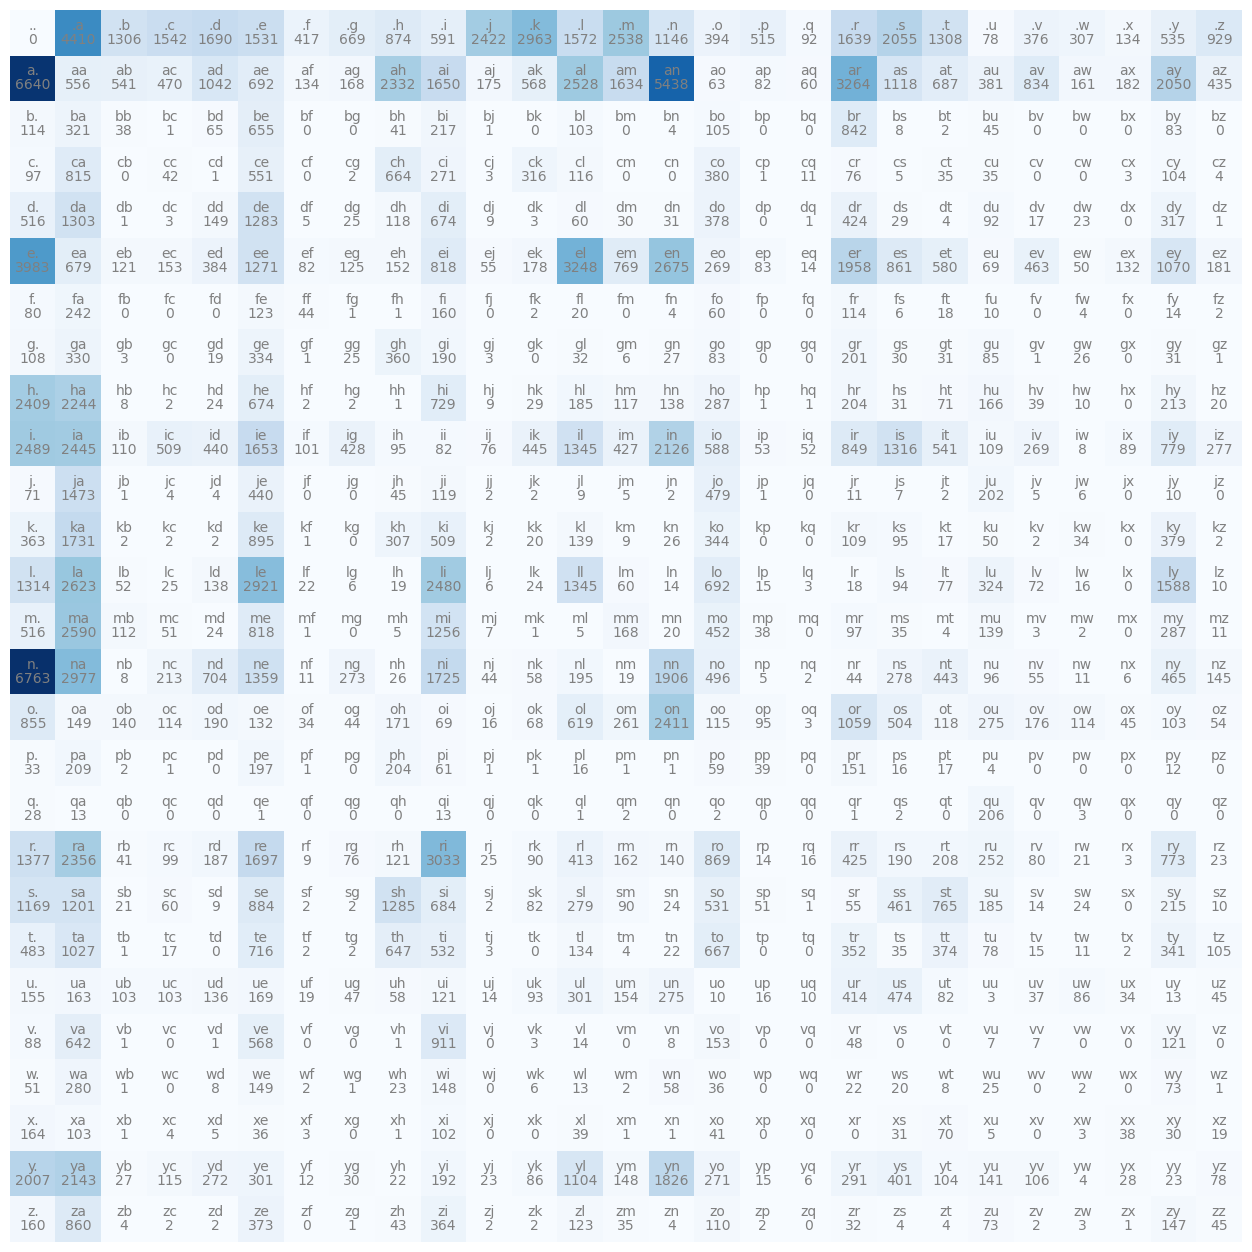

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [16]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [17]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]


'j'

In [18]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [21]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [22]:
p.shape

torch.Size([3])

In [ ]:
# P.shape

In [ ]:
# P.sum(1, keepdim=True).shape

In [ ]:
# 27, 27
# 27,  1

In [ ]:
# P.sum(1).shape

In [ ]:
# 27, 27
#  1, 27

In [27]:
P = (N+1).float()
# print(P.sum(0, keepdims=True))
# print(P.sum(1, keepdims=True))
P /= P.sum(1, keepdims=True) # keepdims = True allows for row wise sums

In [29]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [ ]:
# It might apparently seem that something is going wrong by just looking at the quality of the outputs generated but actually everything is correct. 
# It is just that the bigram model just looks at the previous character to predict the next character.
# This makes the bigram model very inefficient

In [ ]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [35]:
log_likelihood = 0.0
n = 0

for w in words:
# for w in ["bhaswati"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
loss = nll/n
print(f'loss: {loss:.4f}') #2.4544

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
loss: 2.4544


In [ ]:
# Here we can see that the loss of the bigram model is 2.4544

In [ ]:
# Neural Networks

In [36]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [37]:
xs

tensor([ 0,  5, 13, 13,  1])

In [38]:
ys

tensor([ 5, 13, 13,  1,  0])

In [39]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
xenc.shape

torch.Size([5, 27])

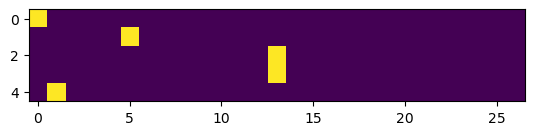

In [41]:
plt.imshow(xenc)

In [42]:
xenc.dtype

torch.float32

In [46]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-4.8959e-01,  1.0399e+00, -4.1334e-01, -1.2192e+00, -6.4374e-01,
          1.2624e-01, -9.6607e-01,  1.6415e+00,  9.1203e-01,  9.6983e-01,
          3.9694e-01, -1.9156e+00, -1.1593e+00,  8.6455e-01,  1.0145e+00,
         -8.2402e-01, -7.5146e-01,  6.8459e-01,  7.5993e-02,  4.9762e-01,
          6.8383e-01, -8.4283e-01,  6.0096e-01, -1.4057e+00,  2.1204e-01,
         -1.4550e-01,  6.5901e-01],
        [ 3.5299e-01, -4.0197e-01, -6.6154e-01, -4.6030e-02, -8.4273e-01,
         -1.2113e+00,  6.7633e-01,  3.1685e-01, -2.6825e-01, -2.3487e-01,
         -1.5259e-01,  4.2283e-01, -1.4922e+00, -2.1593e-01,  1.4317e+00,
         -1.1412e+00,  1.6761e-01, -7.0599e-01,  1.0780e+00,  2.4580e+00,
         -2.9954e-01, -1.0405e-01,  1.5532e-01, -8.7786e-01,  1.8227e+00,
          5.4685e-01, -7.6039e-01],
        [-3.1280e-01,  1.5640e+00, -9.2578e-01, -1.1847e+00,  5.4206e-01,
          5.4949e-01,  5.9876e-01,  4.2910e-01,  1.5129e+00, -6.2680e-01,
         -1.4644e-01, -2.2209e+00, -8.30

In [50]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
# print(counts)
# print(counts.sum(1, keepdims=True))
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0162, 0.0746, 0.0174, 0.0078, 0.0138, 0.0299, 0.0100, 0.1361, 0.0656,
         0.0695, 0.0392, 0.0039, 0.0083, 0.0626, 0.0727, 0.0116, 0.0124, 0.0523,
         0.0284, 0.0434, 0.0522, 0.0113, 0.0481, 0.0065, 0.0326, 0.0228, 0.0509],
        [0.0316, 0.0149, 0.0115, 0.0212, 0.0096, 0.0066, 0.0437, 0.0305, 0.0170,
         0.0176, 0.0191, 0.0339, 0.0050, 0.0179, 0.0930, 0.0071, 0.0263, 0.0110,
         0.0653, 0.2595, 0.0165, 0.0200, 0.0259, 0.0092, 0.1375, 0.0384, 0.0104],
        [0.0147, 0.0957, 0.0079, 0.0061, 0.0344, 0.0347, 0.0365, 0.0308, 0.0909,
         0.0107, 0.0173, 0.0022, 0.0087, 0.0301, 0.0120, 0.0444, 0.0278, 0.0256,
         0.0254, 0.0354, 0.0590, 0.2313, 0.0130, 0.0233, 0.0355, 0.0301, 0.0165],
        [0.0147, 0.0957, 0.0079, 0.0061, 0.0344, 0.0347, 0.0365, 0.0308, 0.0909,
         0.0107, 0.0173, 0.0022, 0.0087, 0.0301, 0.0120, 0.0444, 0.0278, 0.0256,
         0.0254, 0.0354, 0.0590, 0.2313, 0.0130, 0.0233, 0.0355, 0.0301, 0.0165],
        [0.0148, 0.0071,

In [51]:
probs[0]

tensor([0.0162, 0.0746, 0.0174, 0.0078, 0.0138, 0.0299, 0.0100, 0.1361, 0.0656,
        0.0695, 0.0392, 0.0039, 0.0083, 0.0626, 0.0727, 0.0116, 0.0124, 0.0523,
        0.0284, 0.0434, 0.0522, 0.0113, 0.0481, 0.0065, 0.0326, 0.0228, 0.0509])

In [52]:
probs[0].shape

torch.Size([27])

In [53]:
probs[0].sum()

tensor(1.)

In [54]:
P.shape

torch.Size([27, 27])

In [55]:
# (5, 27) @ (27, 27) -> (5, 27)

In [56]:
# SUMMARY ------------------------------>>>>

In [57]:
xs

tensor([ 0,  5, 13, 13,  1])

In [58]:
ys

tensor([ 5, 13, 13,  1,  0])

In [65]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [66]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [67]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [68]:
probs.shape

torch.Size([5, 27])

In [69]:
xs[0].item()

0

In [70]:
ys[0].item()

5

In [71]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [ ]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [72]:
xs

tensor([ 0,  5, 13, 13,  1])

In [73]:
ys

tensor([ 5, 13, 13,  1,  0])

In [143]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [152]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()
print(loss.item())

# backward pass
W.grad = None # set to zero the gradient
loss.backward()
# W.grad

# update weights
W.data += -10 * W.grad

0.28217750787734985


In [ ]:
# --------- !!! OPTIMIZATION !!! but this time actually --------------

In [175]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [157]:
xs.shape

torch.Size([228146])

In [160]:
# minibatch construct
ix = torch.randint(0, xs.shape[0], (32,))
ix

tensor([154507,  54466,  14351,  63275,  72909, 190135, 135676,  43457,  19073,
         41790, 143347, 125090,  26032, 197061,  73145, 118380, 191146, 107240,
         33576, 110735, 113680, 209162, 163677, 154181, 146957, 205612, 215114,
        222840,  81514,  67547, 159531,  15534])

In [162]:
xs[154507]

tensor(2)

In [176]:
num = 32

In [180]:
# gradient descent
for k in range(20000):
  
  # minibatch construct
  ix = torch.randint(0, xs.shape[0], (32,))

  # forward pass
  xenc = F.one_hot(xs[ix], num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys[ix]].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -0.01 * W.grad

2.8436028957366943
2.1963350772857666
2.8455650806427
2.3685009479522705
2.4756975173950195
2.7210750579833984
2.418057680130005
2.8458139896392822
2.54984188079834
2.842090606689453
2.8205416202545166
2.7451751232147217
2.5304689407348633
2.61466121673584
2.4897282123565674
2.650773286819458
2.2552199363708496
2.423276901245117
2.3613128662109375
2.37580943107605
2.8242921829223633
2.393204927444458
2.475808620452881
2.1161537170410156
2.3925492763519287
2.4698588848114014
2.5811715126037598
2.5643362998962402
2.352060556411743
2.437424421310425
2.5175621509552
2.6369895935058594
2.2211408615112305
2.3857553005218506
2.2775166034698486
2.557400703430176
2.4494879245758057
2.5710997581481934
2.4315648078918457
2.509439468383789
2.2882535457611084
2.3935773372650146
2.1308212280273438
2.2549898624420166
2.377915382385254
2.506479263305664
2.456094264984131
2.559330940246582
2.592388868331909
2.37197208404541
2.475343704223633
2.4403433799743652
2.5360326766967773
2.3983521461486816
2.33

In [185]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(20):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momakurailezityha.
konimittain.
llayn.
ka.
da.
staiyauelalerigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
fobspmhinivenvtahlasu.
dsdr.
br.
jol.
pyawaisan.
ja.
fdinee.
